### Student Information
Name: 施睿為

Student ID: 112061536

GitHub ID: rwshihhh

Kaggle name: Ruei Wei Shih

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)
<img src="img/pic0.png" alt="private leaderboard rank" width="2222" height="130">

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

# 1. First: Excises from 'DM2023-Lab2-Master.ipynb'

### Load data

In [10]:
import pandas as pd

### training data
anger_train = pd.read_csv("../data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("../data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("../data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("../data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

### testing data
anger_test = pd.read_csv("../data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("../data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("../data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("../data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


[nltk_data] Downloading package punkt to /home/ace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


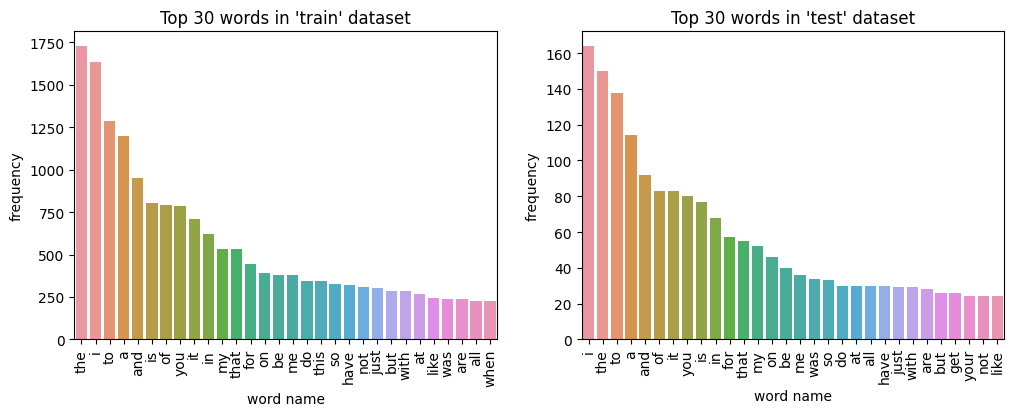

In [11]:
from nltk.tokenize import word_tokenize
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
def get_top_words(text_series, top_n=1):
    # combine all text to a text_series
    text = ' '.join(text_series)
    # use function of nltk ->word_tokenize<- process word
    words = word_tokenize(text)
    # filter words
    words = [word.lower() for word in words if word.isalpha()]
    # Counter the frequency of word
    word_counts = Counter(words)
    top_words = word_counts.most_common(top_n)
    return top_words
# calculate top 30
top_word_train = get_top_words(train_df['text'], top_n=30)
top_word_test = get_top_words(test_df['text'], top_n=30)
top_word_train_name = [i[0] for i in top_word_train]
top_word_test_name = [i[0] for i in top_word_test]
top_word_train_num = [i[-1] for i in top_word_train]
top_word_test_num = [i[-1] for i in top_word_test]

# plot
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
g = sns.barplot(x=top_word_train_name, y=top_word_train_num)
g.set_xticklabels(top_word_train_name, rotation = 90)
plt.title("Top 30 words in 'train' dataset")
plt.xlabel("word name")
plt.ylabel("frequency")
plt.subplot(1,2,2)
g = sns.barplot(x=top_word_test_name, y=top_word_test_num)
g.set_xticklabels(top_word_test_name, rotation = 90)
plt.title("Top 30 words in 'test' dataset")
plt.xlabel("word name")
plt.ylabel("frequency")
plt.show()

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [12]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF1000 = TfidfVectorizer(max_features=1000,tokenizer=nltk.word_tokenize)
# apply analyzer to training data
TFIDF1000.fit(train_df['text'])
train_data_TFIDF_features_1000 = TFIDF1000.transform(train_df['text'])

## check dimension
print(train_data_TFIDF_features_1000.shape)
feature_names_1000 = TFIDF1000.get_feature_names_out()
feature_names_1000[100:110]

/home/ace/anaconda3/envs/dmlab2/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


(3613, 1000)


array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [13]:
# Answer here
"""
Insight from the above confusion matrix:
1. anger and fear may have similar features (word embeddings) in sentences:
    -> get more data of anger and fear to train
    -> utilize more word embeddings from these two categories.
2. sadness is easier mistaken for fear compared to anger and joy:
    -> same as 1.
3. overall, this model can correctly predict most of the senarios because True-Positive are the majority for each label.

4. anger is less likely to be predicted as sadness, compared to predict sadness as anger
    -> if we want to solve the misleading between anger and sadness, add more sadness data might be better.
"""

'\nInsight from the above confusion matrix:\n1. anger and fear may have similar features (word embeddings) in sentences:\n    -> get more data of anger and fear to train\n    -> utilize more word embeddings from these two categories.\n2. sadness is easier mistaken for fear compared to anger and joy:\n    -> same as 1.\n3. overall, this model can correctly predict most of the senarios because True-Positive are the majority for each label.\n\n4. anger is less likely to be predicted as sadness, compared to predict sadness as anger\n    -> if we want to solve the misleading between anger and sadness, add more sadness data might be better.\n'

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

['fear' 'joy' 'fear' 'anger' 'fear' 'anger' 'joy' 'fear' 'joy' 'anger']


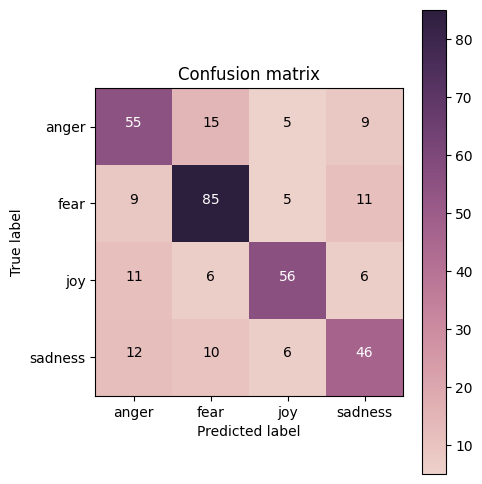

In [15]:
# Answer here
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from data_mining_helpers import plot_confusion_matrix

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']
X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

# create MultinomialNB model
NB_model = MultinomialNB()

# train model
NB_model.fit(X_train, y_train)

# make prediction
y_train_pred_NB = NB_model.predict(X_train)
y_test_pred_NB = NB_model.predict(X_test)

# watch the first 10 prediction results
print(y_test_pred_NB[:10])
cm_NB = confusion_matrix(y_true=y_test, y_pred=y_test_pred_NB) 
my_tags = [ 'fear', 'joy', 'sadness','anger']
plot_confusion_matrix(cm_NB, classes=my_tags, title='Confusion matrix')


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

============Decision Tree============
              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347

=============(END)===================
============Naive Bayes============
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347

=============(END)

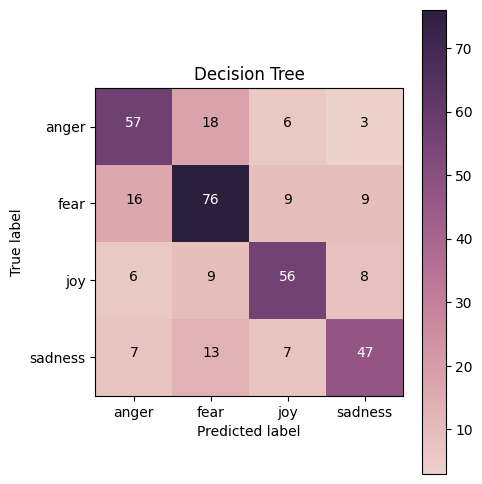

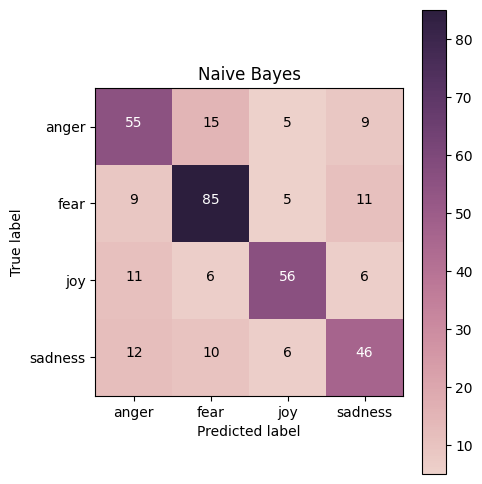

"\nDifference between 'Decision Tree' and 'Naive Bayes':\nNaïve Bayes' accuracy and recall are better.\n    -> altough Naïve Bayesian Classifier have an assumption about class conditional independence, which means \n       each feature's contribution to classification is independent, it still performan well on text classification task,\n       it reveals that the correlation between features are relative low.\n"

In [19]:
# Answer here
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)
## training!
DT_model = DT_model.fit(X_train, y_train)
## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)
## confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 

print("============Decision Tree============")
print(classification_report(y_true=y_test, y_pred=y_test_pred))
print("=============(END)===================")
print("============Naive Bayes============")
print(classification_report(y_true=y_test, y_pred=y_test_pred_NB))
print("=============(END)===================")

plot_confusion_matrix(cm, classes=my_tags, title='Decision Tree')
plot_confusion_matrix(cm_NB, classes=my_tags, title='Naive Bayes')

"""
Difference between 'Decision Tree' and 'Naive Bayes':
Naïve Bayes' accuracy and recall are better.
    -> altough Naïve Bayesian Classifier have an assumption about class conditional independence, which means 
       each feature's contribution to classification is independent, it still performan well on text classification task,
       it reveals that the correlation between features are relative low.
"""

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="../pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="../pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

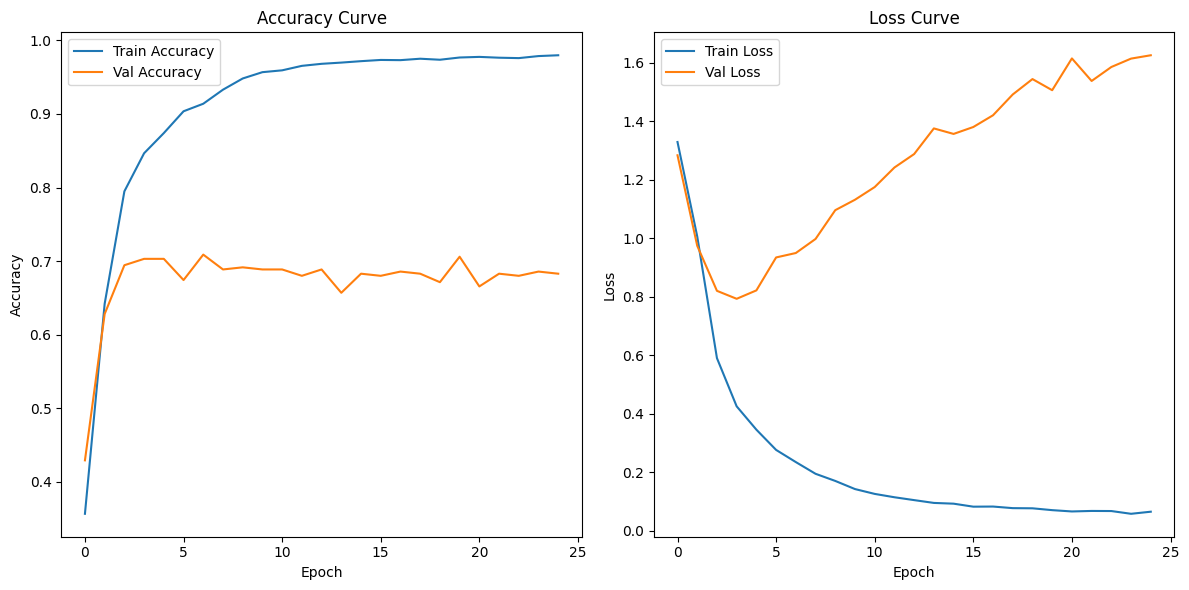

"\nDiscussion:\n1. Accuracy Curve:\nThe training accuracy is quite high and stable after an initial increase, \nsuggesting that the model is performing well on the data it has seen. \nHowever, the validation accuracy is significantly lower than the training \naccuracy and does not improve much over epochs. \n    -> the model is not generalizing well to unseen data.\n\n2. Loss Curve: \nThe graph on the right shows the training loss and validation loss. The \ntraining loss decreases sharply and remains low, which means good performance \non the training data. However, the validation loss decreases initially but \nthen starts to increase.\n    -> the patterns learned by model only perform well on training data.\n\n3. Based on 1.&2., it's overfitting. \n\n4. How to improve?\n    -> Regularization: make the model more robust to noise\n    -> Data Augmentation/More Data: make the data more  diversity\n    -> Dropout: prevent model rely on specific neuron too much\n    -> Early Stopping: Stop

In [21]:
# Answer here
# load training log
training_log = pd.DataFrame()
training_log = pd.read_csv("../logs/training_log.csv")

# accuracy curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_log['epoch'], training_log['accuracy'], label='Train Accuracy')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

# loss curve
plt.subplot(1, 2, 2)
plt.plot(training_log['epoch'], training_log['loss'], label='Train Loss')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.tight_layout()
plt.show()


"""
Discussion:
1. Accuracy Curve:
The training accuracy is quite high and stable after an initial increase, 
suggesting that the model is performing well on the data it has seen. 
However, the validation accuracy is significantly lower than the training 
accuracy and does not improve much over epochs. 
    -> the model is not generalizing well to unseen data.

2. Loss Curve: 
The graph on the right shows the training loss and validation loss. The 
training loss decreases sharply and remains low, which means good performance 
on the training data. However, the validation loss decreases initially but 
then starts to increase.
    -> the patterns learned by model only perform well on training data.

3. Based on 1.&2., it's overfitting. 

4. How to improve?
    -> Regularization: make the model more robust to noise
    -> Data Augmentation/More Data: make the data more  diversity
    -> Dropout: prevent model rely on specific neuron too much
    -> Early Stopping: Stop training when the validation loss begins to increase, 
                       even if the training loss is still decreasing. 
                       (find the sweet spot)
"""

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


Download model by yourself

source: [GoogleNews-vectors-negative300](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/view?resourcekey=0-wjGZdNAUop6WykTtMip30g)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [23]:
# Answer here
# Load model
import numpy as np
from gensim.models import KeyedVectors
## Note: this model is very huge, this will take some time ...
model_path = "../GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')


"""
I use 'mean' method.
"""
def get_sentence_vector(sentence, model):
    words = sentence.split()
    word_vectors = []
    for word in words:
        if word in model:
            word_vectors.append(model[word])
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)  # if all words are not in model's dictionary, return zero vector
    return np.mean(word_vectors, axis=0), word_vectors

# example
sentence = "I love data mining and machine learning."
sentence_vector, word_vector = get_sentence_vector(sentence, w2v_google_model)
print("dimension of sentence vector:", len(sentence_vector))
print(f"len of word_vector: {len(word_vector)}")
print(f"dimension of word_vector[i]: {len(word_vector[0])}")
print(f"Input: word_vector")
print(word_vector)
print(f"Output: sentence_vector")
print(sentence_vector)
"""
Proof: 
Input:  word_vector     -> 5 arrays
Output: sentence_vector -> 1 array

compile 5 word vectors to 1 sentence vector.
"""

load ok
dimension of sentence vector: 300
len of word_vector: 5
dimension of word_vector[i]: 300
Input: word_vector
[array([ 0.07910156, -0.0050354 ,  0.11181641,  0.21289062,  0.13085938,
       -0.01470947, -0.03540039, -0.07763672,  0.04077148,  0.11474609,
        0.00147247, -0.29101562,  0.00457764, -0.20019531, -0.19238281,
        0.08007812,  0.10107422,  0.04858398,  0.15722656, -0.09521484,
       -0.05004883,  0.25      ,  0.33007812, -0.09716797, -0.05566406,
       -0.0071106 , -0.16796875, -0.13574219,  0.05102539, -0.00598145,
        0.10791016,  0.16503906, -0.03955078, -0.03955078,  0.04321289,
        0.12060547,  0.13476562,  0.09375   ,  0.00909424,  0.1640625 ,
        0.21289062, -0.05322266,  0.33398438,  0.01586914,  0.10449219,
        0.24121094, -0.0189209 , -0.04199219,  0.05834961,  0.03271484,
        0.09863281,  0.18945312,  0.04125977,  0.01501465, -0.05883789,
        0.10253906,  0.01538086,  0.03198242,  0.02722168, -0.13769531,
        0.12695312,

'\nProof: \nInput:  word_vector     -> 5 arrays\nOutput: sentence_vector -> 1 array\n\ncompile 5 word vectors to 1 sentence vector.\n'

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'angry', 'irate'

/home/ace/anaconda3/envs/dmlab2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/ace/anaconda3/envs/dmlab2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/ace/anaconda3/envs/dmlab2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


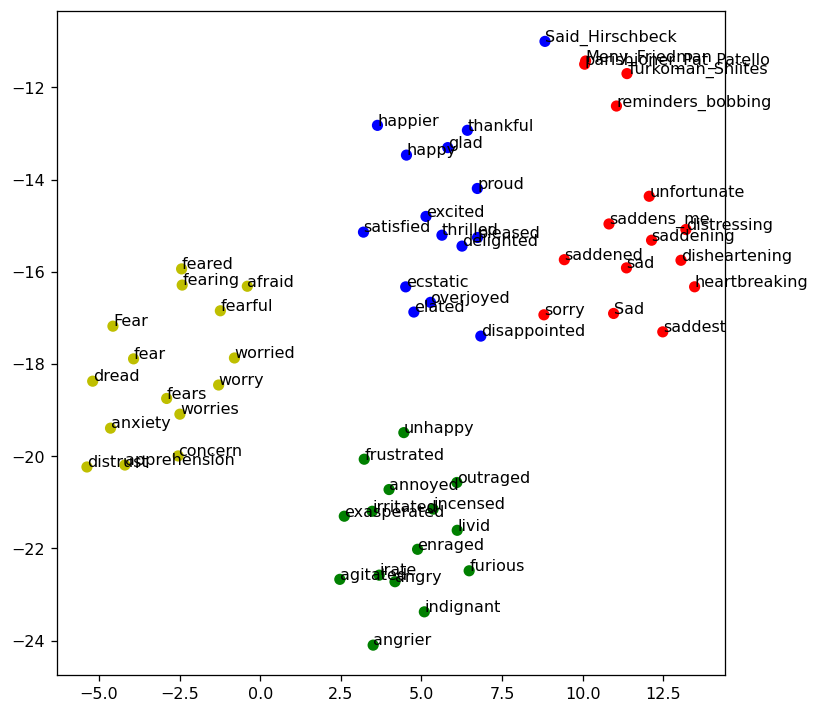

"\nInsight:\n1. If we use more words which are less similar to original words we picked ('happy', 'angry', 'sad', 'fear'),\n   there might be some points overlapped between clussters.\n   -> the limitation of dimension reduction (information loss)\n   -> mat need to tune the learning and iteration times to make the layout more stable\n2. We can see the top-right corner, some of red and blue points seems to construct a new clusster.\n    -> they share the same semantic or contextual relationship that is distinct from the words in other clusters\n    -> Word2Vec model has found a pattern in the data that groups these words together based on their usage in the text corpus\n    -> word embeddings capture subgroupings within larger categories\n"

In [24]:
# Answer here

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 14
happy_words_2 = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words_2 = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words_2 = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words_2 = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words_2)
print('angry_words: ', angry_words_2)
print('sad_words: ', sad_words_2)
print('fear_words: ', fear_words_2)

target_words_2 = happy_words_2 + angry_words_2 + sad_words_2 + fear_words_2
print('\ntarget words: ')
print(target_words_2)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)
""""""
## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size_2 = len(target_words_2)
all_word_2 = list(model.index_to_key)
word_train_2 = target_words_2 + all_word_2[:size]
X_train = model[word_train_2]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size_2, 0], X_tsne[:target_size_2, 1], c=color)
for label, x, y in zip(target_words_2, X_tsne[:target_size_2, 0], X_tsne[:target_size_2, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

"""
Insight:
1. If we use more words which are less similar to original words we picked ('happy', 'angry', 'sad', 'fear'),
   there might be some points overlapped between clussters.
   -> the limitation of dimension reduction (information loss)
   -> mat need to tune the learning and iteration times to make the layout more stable
2. We can see the top-right corner, some of red and blue points seems to construct a new clusster.
    -> they share the same semantic or contextual relationship that is distinct from the words in other clusters
    -> Word2Vec model has found a pattern in the data that groups these words together based on their usage in the text corpus
    -> word embeddings capture subgroupings within larger categories
"""

# 2. Second: Kaggle Competition

### Step1: import required modules and set variables

In [1]:
import os
import torch
import time
import json
import pandas as pd
import numpy as np
from datasets import Dataset, DatasetDict
from transformers import AutoModelForSequenceClassification,TrainingArguments, Trainer
import transformers
from sklearn.preprocessing import OneHotEncoder

! export CUDA_VISIBLE_DEVICES=2 # assign GPU
# os.environ['CUDA_VISIBLE_DEVICES'] = '2'
MODEL_NAME = 'distilbert-base-uncased'
LEARNING_RATE = 2e-5
BATCH_SIZE = 256
EPOCH = 5
OUTPUT_DIR = './output/'+f"lr={str(LEARNING_RATE)}_ecpoch={str(EPOCH)}"

print(torch.cuda.is_available())

True


### Step 2-1: Load data.
### Step 2-2: Split train and test.
### Step 2-3: Remove meaningless attributes for our task

In [2]:
"""Step 2-1: Load data"""
# merge two DataFrame according to 'tweet_id'
df1 = pd.merge(pd.read_csv('kaggle_data/data_identification.csv'), pd.read_csv('kaggle_data/emotion.csv'), on='tweet_id', how='outer')
    # how='outer': retain all rows even two df don't have the same 'tweet_id' in two dataframe.

# Open a JSON file containing many JSON objects
with open('kaggle_data/tweets_DM.json', 'r') as json_file:
    data = [json.loads(line) for line in json_file]
data = [{'tweet_id': item['_source']['tweet']['tweet_id'], 
         'text': item['_source']['tweet']['text'], 
         '_score': item['_score'], 
         '_index': item['_index'],  
         'hashtags': item['_source']['tweet']['hashtags'],
         '_crawldate': item['_crawldate'], 
         '_type': item['_type']
         } for item in data]
df2 = pd.DataFrame(data)
df = pd.merge(df2, df1, on='tweet_id', how='inner')

"""Step 2-2: Split train and test."""
# split train and test using 'identification'
df_train = df[df['identification'] == 'train']
df_test = df[df['identification'] == 'test']

"""Step 2-3: Remove meaningless attributes for our task"""
df_train = df_train.drop(columns=['identification','_crawldate','_index','_type'])
df_test = df_test.drop(columns=['emotion','identification','_crawldate','_index','_type'])

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
# hashtags: list of str -> str 
df_train['hashtags'] = df_train['hashtags'].apply(lambda x: ', '.join(map(str, x)))
df_test['hashtags'] = df_test['hashtags'].apply(lambda x: ', '.join(map(str, x)))
df_test_no_hashtags = df_test.drop(columns=['_score','hashtags'])
df_train_no_hashtags = df_train.drop(columns=['_score','hashtags','tweet_id'])

# Load as dataset
train_dataset = Dataset.from_pandas(df_train_no_hashtags)
test_dataset = Dataset.from_pandas(df_test_no_hashtags)
dataset = DatasetDict({
    'train': train_dataset
    # 'test': test_dataset
})

### Step 3: Pre-processing

In [3]:
tokenizer =transformers.AutoTokenizer.from_pretrained(MODEL_NAME)
encoder = OneHotEncoder(handle_unknown='ignore')
X = [['anticipation'], ['sadness'], ['fear'], ['joy'], ['anger'], ['trust'],['disgust'], ['surprise']]
encoder.fit(X)

LABEL_COUNT = len(encoder.categories_[0])

def preprocess(dataslice):
    """ Input: a batch of your dataset
        Example: { 'text': [['sentence1'], ['setence2'], ...],
                   'label': ['label1', 'label2', ...] }
    """
    label_list=[]
    for emotion in dataslice['emotion']:
        label_list.append(encoder.transform([[emotion]]).toarray()[0])    
    encoding = tokenizer(dataslice['text'])
    output={
        'text': dataslice['text'],
        'emotion': dataslice['emotion'],
        'input_ids': encoding['input_ids'],
        'attention_mask': encoding['attention_mask'],
        'label': label_list
        }
    return output

# map the function to the whole dataset
processed_data = dataset.map(preprocess,    # your processing function
                             batched = True # Process in batches so it can be faster
                            )
print("\nCheck processed\n")
for i in range(5):
    print(f"{i+1}. {processed_data['train'][i]['emotion']} -> {processed_data['train'][i]['label']}")
print(processed_data)
processed_data['train'][0]
print("\nEND\n")

Map:   0%|          | 0/1455563 [00:00<?, ? examples/s]


Check processed

1. anticipation -> [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2. sadness -> [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
3. fear -> [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
4. joy -> [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
5. anticipation -> [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
DatasetDict({
    train: Dataset({
        features: ['text', 'emotion', 'input_ids', 'attention_mask', 'label'],
        num_rows: 1455563
    })
})

END



### Step 4: Training

In [4]:
data_collator = transformers.DataCollatorWithPadding(tokenizer=tokenizer)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME,
                                                           num_labels = LABEL_COUNT)
#split val dataset from train dataset
train_val_dataset = processed_data['train'].train_test_split(test_size=0.1, shuffle=True, seed=42)

training_args = TrainingArguments(
    # output_dir = OUTPUT_DIR,
    output_dir = './output/test',
    learning_rate = LEARNING_RATE,
    per_device_train_batch_size = BATCH_SIZE,
    per_device_eval_batch_size = BATCH_SIZE,
    num_train_epochs = EPOCH,
    logging_dir = ".output/test/logs",
    logging_strategy = "epoch",
    save_strategy = "epoch",
    evaluation_strategy='epoch', 
    report_to = "tensorboard"
    )
trainer = Trainer(
    # set your parameters here
    model = model,
    args = training_args,
    data_collator = data_collator,
    train_dataset = train_val_dataset['train'],
    eval_dataset = train_val_dataset['test'],
)
trainer.train()
#save model
trainer.save_model(OUTPUT_DIR+"/saved_model")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/media/Pluto/alvin/environment/mercury/miniconda3/envs/dmlab2/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss
1,0.243800,0.208097
2,0.203600,0.198871
3,0.193800,0.195548
4,0.187800,0.194270
5,0.184200,0.193827


/media/Pluto/alvin/environment/mercury/miniconda3/envs/dmlab2/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/media/Pluto/alvin/environment/mercury/miniconda3/envs/dmlab2/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/media/Pluto/alvin/environment/mercury/miniconda3/envs/dmlab2/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/media/Pluto/alvin/environme

### Step 5: Predict

In [5]:
from tqdm.notebook import tqdm

## Load test dataset
test_dataset = Dataset.from_pandas(df_test_no_hashtags)
dataset = DatasetDict({
    # 'train': train_dataset
    'test': test_dataset
})


"""Load fine-tuned model and predicti test dataset"""
# Assuming your texts are stored in a list called 'inference_data'
inference_data = list(df_test_no_hashtags['text'])
# Load model
mymodel = AutoModelForSequenceClassification.from_pretrained(OUTPUT_DIR+"/saved_model")
# Check for GPU and move model to GPU if available
num_gpus = torch.cuda.device_count()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
mymodel = mymodel.to(device)
# Function to process and predict in batches
def predict_in_batches(texts, batch_size):
    mymodel.eval()  # Set model to evaluation mode
    predictions = []
    for i in tqdm(range(0, len(texts), batch_size)):
        batch_texts = texts[i:i+batch_size]
        inputs = tokenizer(batch_texts, padding=True, truncation=True, return_tensors="pt")
        inputs = {k: v.to(device) for k, v in inputs.items()}
        with torch.no_grad():
            outputs = mymodel(**inputs)
            batch_predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
            predictions.append(batch_predictions.cpu().numpy())
    return np.concatenate(predictions, axis=0)
# Perform inference
all_predictions = predict_in_batches(inference_data, BATCH_SIZE)
# encoder version
label_map = {0:'anger', 1:'anticipation', 2:'disgust',3:'fear', 4: 'joy', 5:'sadness', 6:'surprise', 7:'trust'}
predicted_indices = np.argmax(all_predictions, axis=-1)
# predicted_labels = [label_map[label.item()] for label in predicted_labels]
predicted_labels = [label_map[index] for index in predicted_indices]


# ensure predicted_labels's length
if len(predicted_labels) != len(df_test_no_hashtags):
    raise ValueError("predicted_labels 的長度必須與 df_test_no_hashtags 中的row相同")
# 創建一個新的 dataframe
result_df = pd.DataFrame({
    'id': df_test_no_hashtags['tweet_id'],
    'emotion': predicted_labels
})

# 將 dataframe 輸出成 CSV 檔案
result_df.to_csv(f"{OUTPUT_DIR}/submit.csv", index=False)
print(f"prediction result are saved at {OUTPUT_DIR}/submit.csv")

  0%|          | 0/1610 [00:00<?, ?it/s]

prediction result are saved at ./output/lr=2e-05_ecpoch=5/submit.csv
